# American Sign Language (ASL) Recognition using MLP approach

### The aim of this project is to recognize what the person is trying to convey using different hand gestures. The dataset contains 29 classes which comprises of A to Z alphabets, nothing, space and delete hand gestures. Here first we will first try training a Multi Layer Perceptron model and check its accuracy to recognize the gesture labels.

In [1]:
import tensorflow as tf
import cv2
from glob import glob
from matplotlib import pyplot as plt
import random
import math
import os
import numpy as np
from numpy.random import seed
seed(100)
tf.random.set_seed(101) 

In [9]:
for dirname, _, filenames in os.walk(r'C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/'):
    print(dirname)

C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/A
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/B
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/C
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/D
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/del
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/E
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/F
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/G
C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (AS

### Defining a function to display sample images from the dataset when their corresponding labels are given as input 

In [2]:
def plotSample(character):
    print("Samples images for letter " + character)
    basePath = r'C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/'
    imagePath = basePath + character + '/**'
    pathData = glob(imagePath)
    
    plt.figure(figsize=(16,16))
    images = random.sample(pathData, 3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(images[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(images[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(images[2]))
    plt.colorbar()
    plt.show()
    return

Samples images for letter C


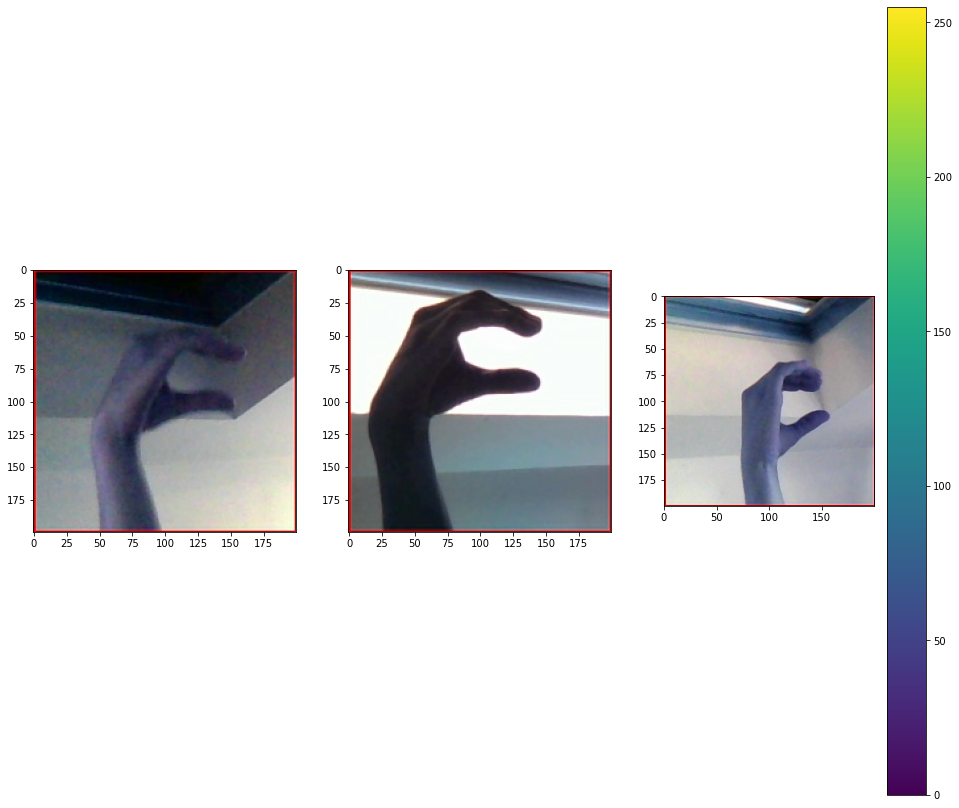

In [8]:
plotSample('C')

### Performing Data Augmentation using ImageDataGenerator to import training images and augment more images

In [10]:
dataPath =  r'C:\Users\KIIT\Documents\LGM-Soc contributions\American Sign Language (ASL) Recognition\Dataset/train/'
resizeTuple = (64, 64)
resizeDim = (64, 64, 3)
numLabels = 29
batchSize = 64

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=0.1)

train_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, shuffle=True, subset="training")
val_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


## Building the Multi Layer Perceptron model 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(29, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               2457800   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

#### Defining a function to determine the learning_rate decay based on epoch schedule.

In [15]:
def scheduler(epoch):
    if epoch < 25:
        return 0.00001
    else:
        return 0.00001 * math.exp(0.1 * (25 - epoch))

In [16]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [17]:
history = model.fit_generator(train_generator, epochs=30, steps_per_epoch = 1224,validation_data=val_generator, validation_steps = 136, callbacks = [callback], verbose = 1)

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1224/1224 [==============================] - 193s 157ms/step - loss: 7.0551 - accuracy: 0.0845 - val_loss: 6.3402 - val_accuracy: 0.1762
Epoch 2/30
1224/1224 [==============================] - 108s 88ms/step - loss: 6.0543 - accuracy: 0.2404 - val_loss: 5.6465 - val_accuracy: 0.2609
Epoch 3/30
1224/1224 [==============================] - 250s 204ms/step - loss: 5.2965 - accuracy: 0.3724 - val_loss: 5.1439 - val_accuracy: 0.3259
Epoch 4/30
1224/1224 [==============================] - 270s 221ms/step - loss: 4.7707 - accuracy: 0.4551 - val_loss: 4.7887 - val_accuracy: 0.3847
Epoch 5/30
1224/1224 [==============================] - 297s 243ms/step - loss: 4.3758 - accuracy: 0.5217 - val_loss: 4.4812 - val_accuracy: 0.4214
Epoch 6/30
1224/1224 [==============================] - 230s 188ms/step - loss: 4.0696 - accuracy: 0.5732 - val_loss: 4.2483 - val_accuracy: 0.4526
Epoch 7/30
1224/1224 [==============================] - 284s 232ms/step - loss: 3.8166 - accuracy: 0.6118 - val_l

In [20]:
import pandas as pd
history_df = pd.DataFrame(history.history)

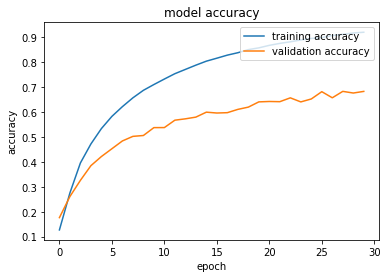

In [24]:
history_df.loc[0:, ['accuracy','val_accuracy']].plot()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper right')
plt.show()

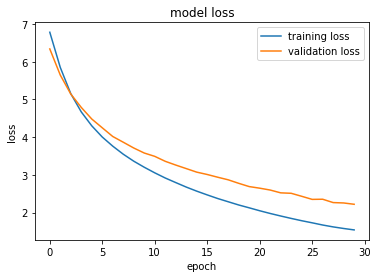

In [25]:
history_df.loc[0:, ['loss', 'val_loss']].plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

### After training and testing the MLP model we can conclude that it reaches a training accuracy of 91.99% and validation accuracy of 68.28%.

###  Inference -  Since the validation accuracy is much less than the training accuracy we can say that the model has been overfitted on the training set. 


### Multi layer perceptron network is not considered to be very efficient over image data. Convolutional neural networks are considered to be more efficient since they also take into consideration, the pixels with their spatial structure and hence perform better than MLP networks. Therefore now we will try this project with CNN approach.